## Dates and Times

A special type of categorical variable are those that instead of taking traditional labels, like color (blue, red), or city (London, Manchester), take dates and / or time as values. For example, date of birth ('29-08-1987', '12-01-2012'), or date of application ('2016-Dec', '2013-March').

Datetime variables can contain dates only, time only, or date and time.

We don't usually work with a datetime variable in their raw format because:

- Date variables contain a huge number of different categories
- We can extract much more information from datetime variables by preprocessing them correctly

In addition, often, date variables will contain dates that were not present in the dataset used to train the machine learning model. In fact, date variables will usually contain dates placed in the future, respect to the dates in the training dataset. Therefore, the machine learning model will not know what to do with them, because it never saw them while being trained. 

**I will cover different was of pre-processing / engineering datetime variables in the section "Engineering Datetime Variables". later in this course**

=============================================================================

## In this demo: Peer to peer lending (Finance)

In this demo, we will use a toy data set which simulates data from a peer-o-peer finance company to inspect discrete and continuous numerical variables.

- You should have downloaded the **Datasets** together with the Jupyter notebooks in **Section 1**.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
# let's load the dataset

# Variable definitions:
#-------------------------
# disbursed amount: loan amount lent to the borrower
# market: risk band in which borrowers are placed
# loan purpose: intended use of the loan
# date_issued: date the loan was issued
# date_last_payment: date of last payment towards repyaing the loan

data = pd.read_csv('../loan.csv')

data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [5]:
# pandas assigns type 'object' when reading dates
# and considers them strings.
# Let's have a look

data[['date_issued', 'date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

Both date_issued and date_last_payment are casted as objects. Therefore, pandas will treat them as strings or categorical variables.

In order to instruct pandas to treat them as dates, we need to re-cast them into datetime format. See below.

In [6]:
# now let's parse the dates, currently coded as strings, into datetime format
# this will allow us to make some analysis afterwards

data['date_issued_dt'] = pd.to_datetime(data['date_issued'])
data['date_last_payment_dt'] = pd.to_datetime(data['date_last_payment'])

data[['date_issued', 'date_issued_dt', 'date_last_payment', 'date_last_payment_dt']].head()

,date_issued,date_issued_dt,date_last_payment,date_last_payment_dt
0,2013-06-11,2013-06-11,2016-01-14,2016-01-14
1,2014-05-08,2014-05-08,2016-01-25,2016-01-25
2,2013-10-26,2013-10-26,2014-09-26,2014-09-26
3,2015-08-20,2015-08-20,2016-01-26,2016-01-26
4,2014-07-22,2014-07-22,2016-01-11,2016-01-11


In [7]:
# let's extract the month and the year from the variable date
# to make nicer plots

# more on this in section 12 of the course

data['month'] = data['date_issued_dt'].dt.month
data['year'] = data['date_issued_dt'].dt.year

Text(0, 0.5, 'Disbursed Amount')

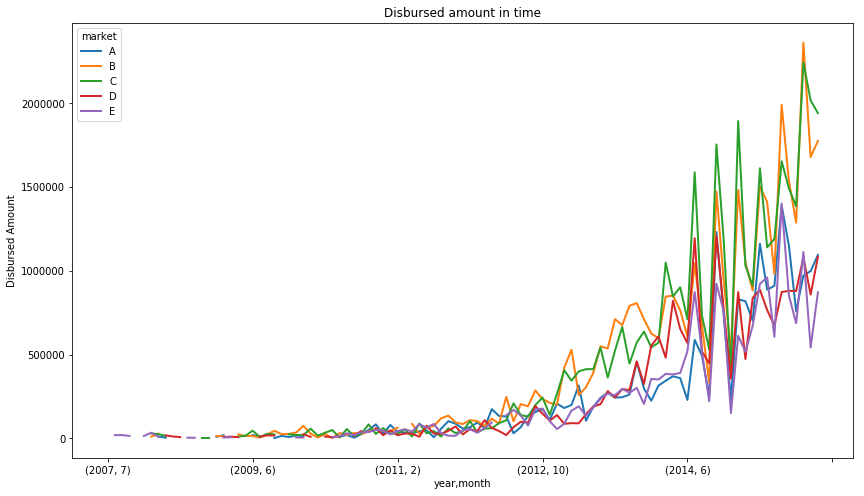

In [8]:
# let's see how much money Lending Club has disbursed
# (i.e., lent) over the years to the different risk
# markets (grade variable)

fig = data.groupby(['year','month', 'market'])['disbursed_amount'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount')

This toy finance company seems to have increased the amount of money lent from 2012 onwards. The tendency indicates that they continue to grow. In addition, we can see that their major business comes from lending money to C and B grades.

'A' grades are the lower risk borrowers, borrowers that most likely will be able to repay their loans, as they are typically in a better financial situation. Borrowers within this grade are charged lower interest rates.

D and E grades represent the riskier borrowers. Usually borrowers in somewhat tighter financial situations, or for whom there is not sufficient financial history to make a reliable credit assessment. They are typically charged higher rates, as the business, and therefore the investors, take a higher risk when lending them money.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**